# Data Explore

## Load modules

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
from collections import Counter
from subprocess import check_output

In [2]:
MEMBERS = pd.read_csv("../data/processed/MEMBERS_PRED2.csv", parse_dates=True)

In [3]:
MEMBERS.head()

,Unnamed: 0,msno,registration_init_time,city,bd,gender,registered_via
0,0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,2014-06-08,1.0,0.0,NaN,7.0
1,1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,2010-11-18,15.0,26.0,male,9.0
2,2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,2014-09-27,1.0,0.0,NaN,7.0
3,3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,2016-03-15,18.0,21.0,male,7.0
4,4,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,2012-01-22,22.0,32.0,male,9.0


In [4]:
MEMBERS.describe()

,Unnamed: 0,city,bd,registered_via
count,993528.000000,877658.000000,877658.000000,877658.000000
mean,496763.500000,5.881237,13.451132,6.911339
std,286806.973462,6.423153,20.224122,1.904119
min,0.000000,1.000000,-3152.000000,3.000000
25%,248381.750000,1.000000,0.000000,7.000000
50%,496763.500000,1.000000,0.000000,7.000000
75%,745145.250000,13.000000,27.000000,9.000000
max,993527.000000,22.000000,2016.000000,13.000000


In [5]:
MEMBERS[MEMBERS["gender"].isna() == True]

,Unnamed: 0,msno,registration_init_time,city,bd,gender,registered_via
0,0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,2014-06-08,1.0,0.0,NaN,7.0
2,2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,2014-09-27,1.0,0.0,NaN,7.0
6,6,++0/NopttBsaAn6qHZA2AWWrDg7Me7UOMs1vsyo4tSI=,2016-03-20,1.0,0.0,NaN,7.0
7,7,++0BJXY8tpirgIhJR14LDM1pnaRosjD1mdO1mIKxlJA=,2015-08-07,1.0,0.0,NaN,9.0
8,8,++0EzISdtKY48Z0GY62jer/LFQwrNIAbADdtU5xStGY=,2013-12-05,1.0,0.0,NaN,3.0
9,9,++0wqjjQge1mBBe5r4ciHGKwtF/m322zkra7CK8I+Mw=,NaN,NaN,NaN,NaN,NaN
10,10,++1G0wVY14Lp0VXak1ymLhPUdXPSFJVBnjWwzGxBKJs=,2015-09-09,1.0,0.0,NaN,7.0
11,11,++1GCIyXZO7834NjDKmcK1lBVLQi9PsN6sOC7wfW+8g=,2016-07-05,1.0,0.0,NaN,7.0
12,12,++1Wu2wKBA60W9F9sMh15RXmh1wN1fjoVGzNqvw/Gro=,NaN,NaN,NaN,NaN,NaN
13,13,++2Ju1OdxLSyexwhZ/C0glNK0DMIfUjsFpk9lt8Dll8=,NaN,NaN,NaN,NaN,NaN


In [6]:
STATUS = pd.read_csv("../data/raw/STATUS_02.csv")

In [7]:
STATUS.head()

,msno,status
0,++9l7+WGOZ96gNp0TDXxHAydOlXYE0CiuqWFTxA6zZI=,1
1,++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=,1
2,++FNH/2Fg+6/Q+61X5t3PTVvNsFC699bnEVaVN6HT+o=,1
3,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,1
4,++UEvwqAY2F9VpiLLHeicRU4D6FzbSDiaDrFkPrhqq8=,1


In [8]:
STATUS['status'] = STATUS['status'].astype(str)
STATUS['status'].value_counts()

1    31577
0    18139
Name: status, dtype: int64

In [9]:
training = pd.merge(left = STATUS,right = MEMBERS,how = 'left',on=['msno'])
training.head()

,msno,status,Unnamed: 0,registration_init_time,city,bd,gender,registered_via
0,++9l7+WGOZ96gNp0TDXxHAydOlXYE0CiuqWFTxA6zZI=,1,NaN,NaN,NaN,NaN,NaN,NaN
1,++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=,1,NaN,NaN,NaN,NaN,NaN,NaN
2,++FNH/2Fg+6/Q+61X5t3PTVvNsFC699bnEVaVN6HT+o=,1,NaN,NaN,NaN,NaN,NaN,NaN
3,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,1,NaN,NaN,NaN,NaN,NaN,NaN
4,++UEvwqAY2F9VpiLLHeicRU4D6FzbSDiaDrFkPrhqq8=,1,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49716 entries, 0 to 49715
Data columns (total 8 columns):
msno                      49716 non-null object
status                    49716 non-null object
Unnamed: 0                7190 non-null float64
registration_init_time    6667 non-null object
city                      6667 non-null float64
bd                        6667 non-null float64
gender                    5033 non-null object
registered_via            6667 non-null float64
dtypes: float64(4), object(4)
memory usage: 3.4+ MB


In [11]:
training = training.dropna()

In [12]:
training['registration_init_time'] = training['registration_init_time'].map(lambda x: datetime(int(x[:4]), int(x[5:7]), int(x[8:])))
training.head()

,msno,status,Unnamed: 0,registration_init_time,city,bd,gender,registered_via
11,+/3y+kPYUo7hVOhqU7zDnyGx5VqmA/KqPtP5OPJTUIM=,0,248.0,2007-09-07,22.0,30.0,female,9.0
13,+/EF6xPAo8HLjhC7K8VBWUkXnCYi7KYIaNf071llMV0=,0,287.0,2012-05-16,5.0,35.0,female,9.0
14,+/Jks8tmNXiN/eq2VFfpD7FM7ZO79rK6Uw4w+m5KXSE=,0,303.0,2014-08-25,13.0,24.0,male,3.0
15,+/YDLr+IV4Vk7rD+MDgIlY/vos6aWxZRHokKdN2M7o4=,0,348.0,2012-03-16,22.0,26.0,male,3.0
38,+1eAmfPiXsMG0J+U/j7YTeXO+u0/ZhZqmoXfXKOY57I=,0,889.0,2013-09-12,13.0,22.0,female,3.0


## Training data

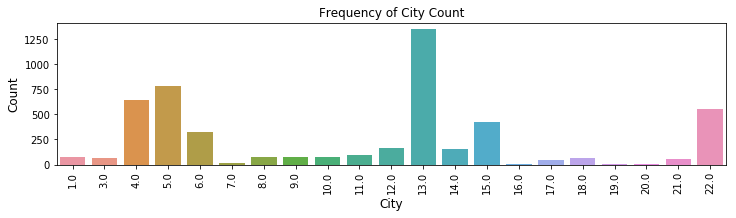

City Count [(13.0, 1346), (5.0, 778), (4.0, 646), (22.0, 556), (15.0, 424), (6.0, 323), (12.0, 162), (14.0, 157), (11.0, 93), (8.0, 79), (10.0, 76), (9.0, 72), (1.0, 71), (3.0, 61), (18.0, 61), (21.0, 56), (17.0, 42), (7.0, 18), (16.0, 7), (20.0, 4), (19.0, 1)]


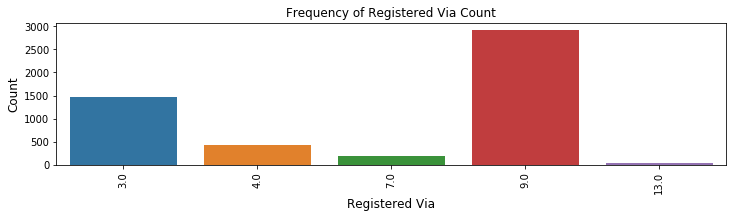

Registered Via Count [(9.0, 2929), (3.0, 1459), (4.0, 432), (7.0, 185), (13.0, 28)]


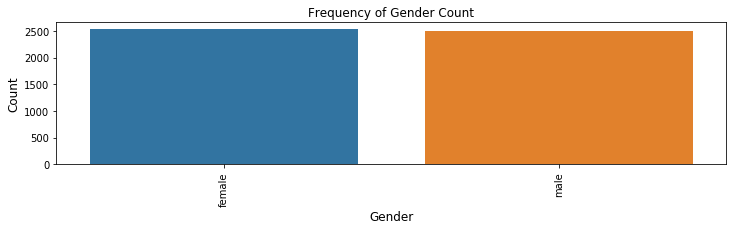

Gender Count [('female', 2533), ('male', 2500)]


In [15]:
# City count
fig1 = plt.figure(figsize=(12,12))
plt.subplot(411)
city_order = training['city'].unique()
city_order=sorted(city_order, key=lambda x: float(x))
sns.countplot(x="city", data=training , order = city_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of City Count", fontsize=12)
plt.show()
fig1.savefig("Frequency of City Count.png", dpi=fig1.dpi)
city_count = Counter(training['city']).most_common()
print("City Count " +str(city_count))

#Registered Via Count
fig2 = plt.figure(figsize=(12,12))
plt.subplot(412)
R_V_order = training['registered_via'].unique()
R_V_order = sorted(R_V_order, key=lambda x: str(x))
R_V_order = sorted(R_V_order, key=lambda x: float(x))
#above repetion of commands are very silly, but this was the only way I was able to diplay what I wanted
sns.countplot(x="registered_via", data=training,order = R_V_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Registered Via', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Registered Via Count", fontsize=12)
plt.show()
fig2.savefig("Frequency of Registered Via Count.png", dpi=fig2.dpi)
RV_count = Counter(training['registered_via']).most_common()
print("Registered Via Count " +str(RV_count))

#Gender count
fig3 = plt.figure(figsize=(12,12))
plt.subplot(413)
sns.countplot(x="gender", data=training)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Gender Count", fontsize=12)
plt.show()
fig3.savefig("Frequency of Gender Count.png", dpi=fig2.dpi)
gender_count = Counter(training['gender']).most_common()
print("Gender Count " +str(gender_count))

### registration_init_time Trends exploration

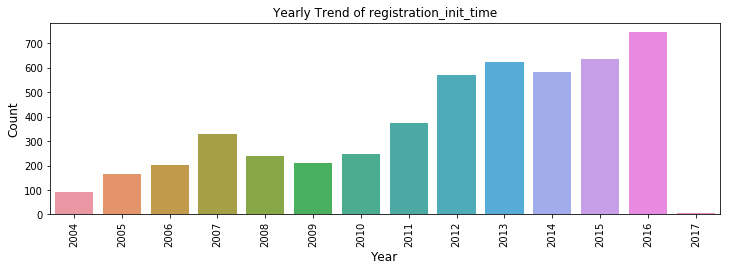

Yearly Count [(2016, 748), (2015, 638), (2013, 626), (2014, 583), (2012, 570), (2011, 374), (2007, 331), (2010, 249), (2008, 240), (2009, 209), (2006, 203), (2005, 166), (2004, 91), (2017, 5)]


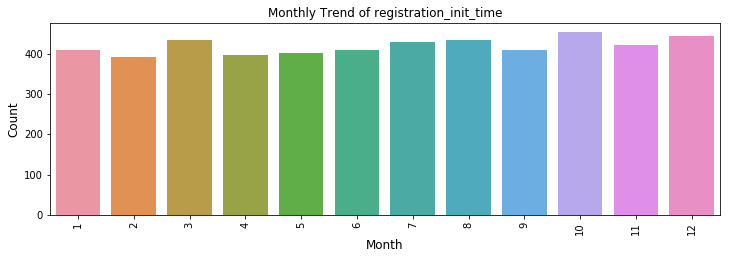

Monthly Count [(10, 453), (12, 444), (8, 434), (3, 433), (7, 430), (11, 421), (9, 410), (1, 410), (6, 408), (5, 401), (4, 396), (2, 393)]


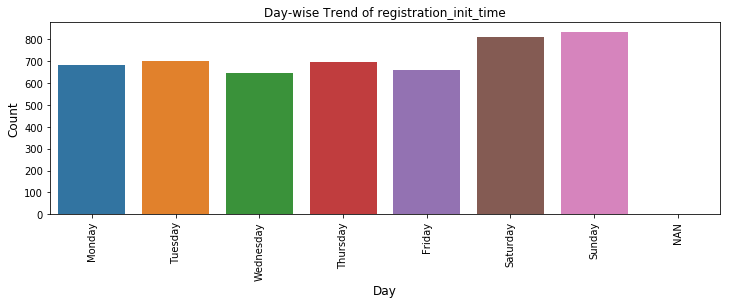

Day-wise Count [('Sunday', 836), ('Saturday', 810), ('Tuesday', 700), ('Thursday', 695), ('Monday', 685), ('Friday', 660), ('Wednesday', 647)]


In [16]:
#registration_init_time yearly trend
training['registration_init_time_year'] = pd.DatetimeIndex(training['registration_init_time']).year
training['registration_init_time_year'] = training.registration_init_time_year.apply(lambda x: int(x) if pd.notnull(x) else "NAN" )
year_count=training['registration_init_time_year'].value_counts()
#print(year_count)
fig4 = plt.figure(figsize=(12,12))
plt.subplot(311)
year_order = training['registration_init_time_year'].unique()
year_order=sorted(year_order, key=lambda x: str(x))
year_order = sorted(year_order, key=lambda x: float(x))
sns.barplot(year_count.index, year_count.values,order=year_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Yearly Trend of registration_init_time", fontsize=12)
plt.show()
fig4.savefig("Yearly Trend of registration_init_time.png", dpi=fig4.dpi)
year_count_2 = Counter(training['registration_init_time_year']).most_common()
print("Yearly Count " +str(year_count_2))

#registration_init_time monthly trend
training['registration_init_time_month'] = pd.DatetimeIndex(training['registration_init_time']).month
training['registration_init_time_month'] = training.registration_init_time_month.apply(lambda x: int(x) if pd.notnull(x) else "NAN" )
month_count=training['registration_init_time_month'].value_counts()
fig5 = plt.figure(figsize=(12,12))
plt.subplot(312)
month_order = training['registration_init_time_month'].unique()
month_order = sorted(month_order, key=lambda x: str(x))
month_order = sorted(month_order, key=lambda x: float(x))
sns.barplot(month_count.index, month_count.values,order=month_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Monthly Trend of registration_init_time", fontsize=12)
plt.show()
fig5.savefig("Monthly Trend of registration_init_time.png", dpi=fig5.dpi)
month_count_2 = Counter(training['registration_init_time_month']).most_common()
print("Monthly Count " +str(month_count_2))

#registration_init_time day wise trend
training['registration_init_time_weekday'] = pd.DatetimeIndex(training['registration_init_time']).weekday_name
training['registration_init_time_weekday'] = training.registration_init_time_weekday.apply(lambda x: str(x) if pd.notnull(x) else "NAN" )
day_count=training['registration_init_time_weekday'].value_counts()
fig6 = plt.figure(figsize=(12,12))
plt.subplot(313)
#day_order = training['registration_init_time_day'].unique()
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','NAN']
sns.barplot(day_count.index, day_count.values,order=day_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Day-wise Trend of registration_init_time", fontsize=12)
plt.show()
fig6.savefig("Day-wise Trend of registration_init_time.png", dpi=fig6.dpi)
day_count_2 = Counter(training['registration_init_time_weekday']).most_common()
print("Day-wise Count " +str(day_count_2))

## Relation of between train data set and members Data set

status,0,1,Ratio
gender,,,
female,2346,187,0.079710
male,2316,184,0.079447


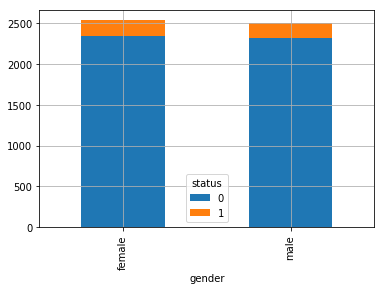

In [17]:
#Gender
gender_crosstab=pd.crosstab(training['gender'],training['status'])
ax = gender_crosstab.plot(kind='bar', stacked=True, grid=True)
fig = ax.get_figure()
fig.savefig('gender_crosstab')
gender_crosstab["Ratio"] =  gender_crosstab.iloc[:, 1] / gender_crosstab.iloc[:, 0]
gender_crosstab

status,0,1,Ratio
registered_via,,,
3.0,1323,136,0.102797
4.0,374,58,0.155080
7.0,166,19,0.114458
9.0,2772,157,0.056638
13.0,27,1,0.037037


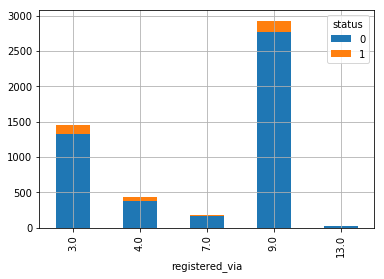

In [20]:
#Registered Via
registered_via_crosstab=pd.crosstab(training['registered_via'],training['status'])
ax = registered_via_crosstab.plot(kind='bar', stacked=True, grid=True)
fig = ax.get_figure()
fig.savefig('registered_via_crosstab')
registered_via_crosstab["Ratio"] =  registered_via_crosstab.iloc[:, 1] / registered_via_crosstab.iloc[:, 0]
registered_via_crosstab

status,0,1,Ratio
city,,,
1.0,51,20,0.392157
3.0,53,8,0.150943
4.0,605,41,0.067769
5.0,717,61,0.085077
6.0,301,22,0.073090
7.0,18,0,0.000000
8.0,71,8,0.112676
9.0,66,6,0.090909
10.0,74,2,0.027027


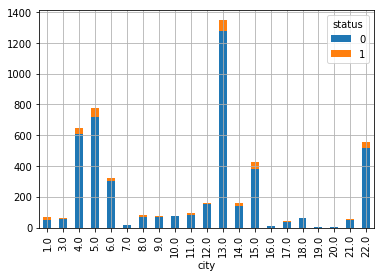

In [22]:
#city
city_crosstab=pd.crosstab(training['city'],training['status'])
ax = city_crosstab.plot(kind='bar', stacked=True, grid=True)
fig = ax.get_figure()
fig.savefig('city_crosstab')
city_crosstab["Ratio"] =  city_crosstab.iloc[:,1] / city_crosstab.iloc[:,0]
city_crosstab

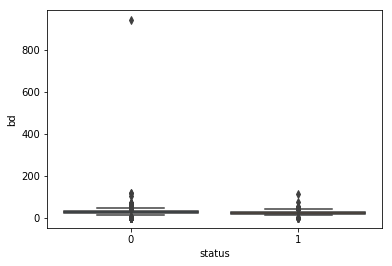

In [25]:
#Birth Date
ax = sns.boxplot(x=training["status"],y=training["bd"],data=training)
fig = ax.get_figure()
fig.savefig('status_boxplot')

## Data Exploration in members data ( just for comparison with training merged dataset )

In [26]:
MEMBERS = MEMBERS.drop(labels="Unnamed: 0", axis=1)

In [27]:
MEMBERS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993528 entries, 0 to 993527
Data columns (total 6 columns):
msno                      993528 non-null object
registration_init_time    877658 non-null object
city                      877658 non-null float64
bd                        877658 non-null float64
gender                    391839 non-null object
registered_via            877658 non-null float64
dtypes: float64(3), object(3)
memory usage: 45.5+ MB


In [28]:
MEMBERS = MEMBERS.fillna("Unknown")

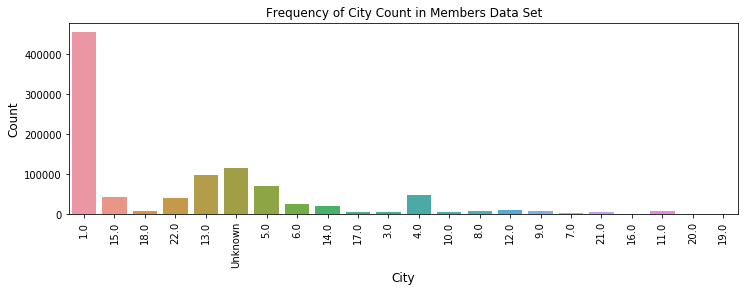

City Count [(1.0, 455732), ('Unknown', 115870), (13.0, 98306), (5.0, 71331), (4.0, 47966), (15.0, 43370), (22.0, 42150), (6.0, 26034), (14.0, 20171), (12.0, 11557), (9.0, 9565), (11.0, 9039), (18.0, 7843), (8.0, 7692), (10.0, 6539), (17.0, 5546), (21.0, 5287), (3.0, 5091), (7.0, 2666), (16.0, 956), (20.0, 677), (19.0, 140)]


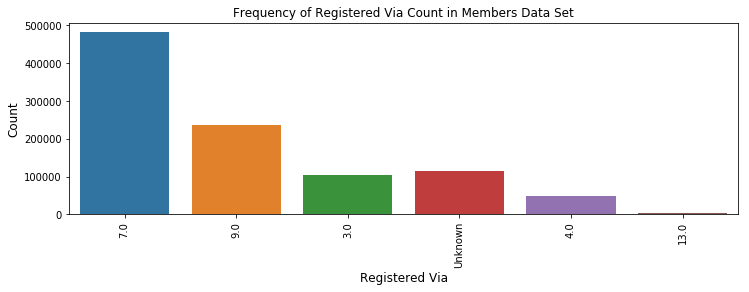

Registered Via Count [(7.0, 483156), (9.0, 236659), ('Unknown', 115870), (3.0, 105458), (4.0, 49290), (13.0, 3095)]


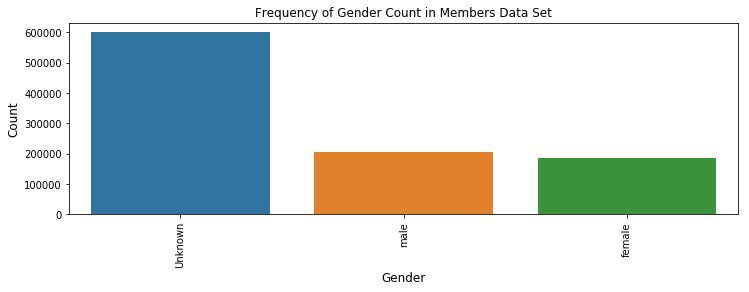

Gender Count [('Unknown', 601689), ('male', 206366), ('female', 185473)]


In [29]:
# City count in Members Data Set
fig = plt.figure(figsize=(12,12))
plt.subplot(311)
sns.countplot(x="city", data=MEMBERS)
plt.ylabel('Count', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of City Count in Members Data Set", fontsize=12)
plt.show()
fig.savefig("Frequency of City Count in Members Data Set.png", dpi=fig.dpi)
city_count = Counter(MEMBERS['city']).most_common()
print("City Count " +str(city_count))

#Registered Via Count in Members Data Set
fig = plt.figure(figsize=(12,12))
plt.subplot(312)
sns.countplot(x="registered_via", data=MEMBERS)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Registered Via', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Registered Via Count in Members Data Set", fontsize=12)
plt.show()
fig.savefig("Frequency of Registered Via Count in Members Data Set.png", dpi=fig.dpi)
RV_count = Counter(MEMBERS['registered_via']).most_common()
print("Registered Via Count " +str(RV_count))


#Gender count in Members Data Set
fig = plt.figure(figsize=(12,12))
plt.subplot(313)
sns.countplot(x="gender", data=MEMBERS)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Gender Count in Members Data Set", fontsize=12)
plt.show()
fig.savefig("Frequency of Gender Count in Members Data Set.png", dpi=fig.dpi)
gender_count = Counter(MEMBERS['gender']).most_common()
print("Gender Count " +str(gender_count))

In [27]:
tmp_1=training.bd.value_counts()
tmp_1.head()

26.0    346
24.0    333
27.0    326
25.0    316
23.0    292
Name: bd, dtype: int64

In [28]:
training['bd'] = training.bd.apply(lambda x: int(x) if pd.notnull(x) else "NAN" )
bd_count = Counter(training['bd']).most_common()
print("BD Count " +str(bd_count))

BD Count [(26, 346), (24, 333), (27, 326), (25, 316), (23, 292), (28, 264), (29, 251), (30, 236), (22, 227), (31, 193), (21, 187), (0, 170), (20, 162), (33, 157), (32, 150), (35, 137), (34, 136), (37, 128), (36, 114), (19, 105), (38, 86), (18, 79), (39, 75), (40, 68), (41, 56), (17, 44), (43, 43), (42, 41), (16, 29), (44, 28), (50, 28), (45, 27), (46, 27), (47, 26), (52, 21), (49, 18), (48, 14), (51, 11), (53, 9), (15, 9), (54, 9), (62, 7), (56, 5), (60, 4), (67, 3), (58, 3), (63, 3), (64, 3), (57, 3), (55, 3), (59, 2), (117, 2), (61, 2), (69, 1), (112, 1), (7, 1), (75, 1), (6, 1), (70, 1), (14, 1), (12, 1), (65, 1), (71, 1), (68, 1), (105, 1), (13, 1), (72, 1), (939, 1)]


In [30]:
#training.loc[(training['bd'] <= 1), 'bd'] = -99999
#training.loc[(training['bd'] >= 100), 'bd'] = -99999
training['bd'] = training.bd.apply(lambda x: -99999 if float(x)<=1 else x )
training['bd'] = training.bd.apply(lambda x: -99999 if float(x)>=100 else x )

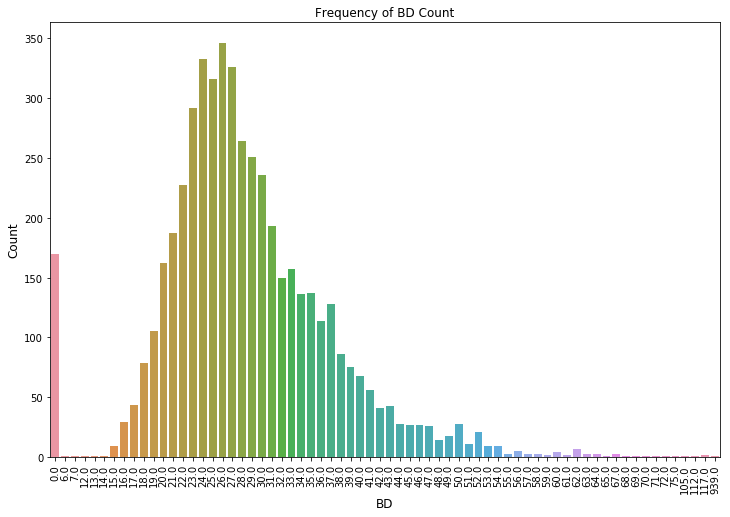

BD Count [(26.0, 346), (24.0, 333), (27.0, 326), (25.0, 316), (23.0, 292), (28.0, 264), (29.0, 251), (30.0, 236), (22.0, 227), (31.0, 193), (21.0, 187), (0.0, 170), (20.0, 162), (33.0, 157), (32.0, 150), (35.0, 137), (34.0, 136), (37.0, 128), (36.0, 114), (19.0, 105), (38.0, 86), (18.0, 79), (39.0, 75), (40.0, 68), (41.0, 56), (17.0, 44), (43.0, 43), (42.0, 41), (16.0, 29), (44.0, 28), (50.0, 28), (45.0, 27), (46.0, 27), (47.0, 26), (52.0, 21), (49.0, 18), (48.0, 14), (51.0, 11), (53.0, 9), (15.0, 9), (54.0, 9), (62.0, 7), (56.0, 5), (60.0, 4), (67.0, 3), (58.0, 3), (63.0, 3), (64.0, 3), (57.0, 3), (55.0, 3), (59.0, 2), (117.0, 2), (61.0, 2), (69.0, 1), (112.0, 1), (7.0, 1), (75.0, 1), (6.0, 1), (70.0, 1), (14.0, 1), (12.0, 1), (65.0, 1), (71.0, 1), (68.0, 1), (105.0, 1), (13.0, 1), (72.0, 1), (939.0, 1)]


In [30]:
#Birth Date count in training Data Set
fig = plt.figure(figsize=(12,8))
bd_order = training['bd'].unique()
bd_order = sorted(bd_order, key=lambda x: str(x))
bd_order = sorted(bd_order, key=lambda x: float(x))
#above repetion of commands are very silly, but this was the only way I was able to diplay what I wanted
sns.countplot(x="bd", data=training , order = bd_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('BD', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of BD Count", fontsize=12)
plt.show()
fig.savefig("Frequency of BD Count.png", dpi=fig.dpi)
bd_count = Counter(training['bd']).most_common()
print("BD Count " +str(bd_count))

Mean of Birth Date = 28.36956089807272
Median of Birth Date = 27.0


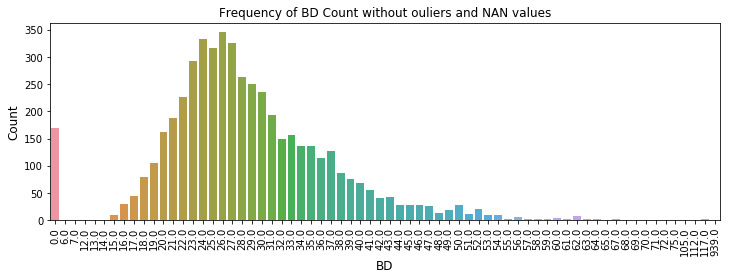

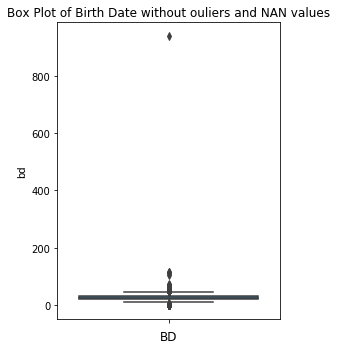

In [31]:
tmp_bd = training[training.bd != -99999]
print("Mean of Birth Date = " +str(np.mean(tmp_bd['bd'])))
print("Median of Birth Date = " +str(np.median(tmp_bd['bd'])))
#print("Mode of Birth Date = " +str(np.mode(tmp_bd['bd'])))
fig = plt.figure(figsize=(12,8))
plt.subplot(211)
bd_order_2 = tmp_bd['bd'].unique()
bd_order_2 = sorted(bd_order_2, key=lambda x: float(x))
sns.countplot(x="bd", data=tmp_bd , order = bd_order_2)
plt.ylabel('Count', fontsize=12)
plt.xlabel('BD', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of BD Count without ouliers and NAN values", fontsize=12)
plt.show()
fig.savefig("Frequency of BD Count without ouliers and NAN values.png", dpi=fig.dpi)

fig = plt.figure(figsize=(4,12))
plt.subplot(212)
sns.boxplot(y=tmp_bd["bd"],data=tmp_bd)
plt.xlabel('BD', fontsize=12)
plt.title("Box Plot of Birth Date without ouliers and NAN values", fontsize=12)
plt.show()
fig.savefig("Box Plot of Birth Date without ouliers and NAN values.png", dpi=fig.dpi)

In [33]:
del MEMBERS
del STATUS
del training

In [34]:
TRANSACTION = pd.read_csv("../data/processed/TRANSACTION_PRED.csv", parse_dates=True)

In [35]:
TRANSACTION.head()

,Unnamed: 0,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,Exp_Year,Exp_Month
0,0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30,99,99,1,2016-11-16,2016-12-15,0,2016,12
1,1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30,99,99,1,2016-12-15,2017-01-15,0,2017,1
2,2,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30,99,99,1,2017-01-15,2017-02-15,0,2017,2
3,3,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30,99,99,1,2017-02-15,2017-03-15,0,2017,3
4,4,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,31,149,149,1,2015-01-31,2015-03-19,0,2015,3


In [36]:
TRANSACTION['is_cancel'] = TRANSACTION['is_cancel'].astype(str)
TRANSACTION['is_cancel'].value_counts()

0    15805397
1      278953
Name: is_cancel, dtype: int64

In [37]:
TRANSACTION['is_auto_renew'] = TRANSACTION['is_auto_renew'].astype(str)
TRANSACTION['is_auto_renew'].value_counts()

1    14864955
0     1219395
Name: is_auto_renew, dtype: int64

In [38]:
Non_monthly_sub = TRANSACTION['payment_plan_days'][TRANSACTION['payment_plan_days'] != 30][TRANSACTION['payment_plan_days'] != 31]

In [39]:
Non_monthly_sub.astype(str)
Non_monthly_sub.value_counts()

0      599586
7       49294
195     27685
410     18347
180     11651
90      10346
100      6863
120      6637
10       5125
60       3230
1        2844
395      1959
360      1880
200      1448
240      1073
400       745
14        598
365       326
35        274
450       217
70        189
80        102
21         97
270        89
99         67
66         56
230        31
415        22
110        19
3           8
15          4
45          3
2           3
Name: payment_plan_days, dtype: int64

In [40]:
TRANSACTION[TRANSACTION["plan_list_price"] != TRANSACTION["actual_amount_paid"]]

,Unnamed: 0,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,Exp_Year,Exp_Month
7,7,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,0,0,149,1,2015-04-30,2015-06-19,0,2015,6
27,27,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,41,0,0,149,1,2015-04-26,2015-05-26,0,2015,5
65,65,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,39,0,0,149,1,2015-04-30,2015-06-23,0,2015,6
82,82,++/ZHqwUNa7U21Qz+zqteiXlZapxey86l6eEorrak/g=,14,0,0,149,1,2015-03-31,2015-04-30,0,2015,4
83,83,++/ZHqwUNa7U21Qz+zqteiXlZapxey86l6eEorrak/g=,14,0,0,149,1,2015-06-30,2015-07-31,0,2015,7
84,84,++/ZHqwUNa7U21Qz+zqteiXlZapxey86l6eEorrak/g=,14,0,0,149,1,2015-07-31,2015-08-31,0,2015,8
85,85,++/ZHqwUNa7U21Qz+zqteiXlZapxey86l6eEorrak/g=,14,0,0,149,1,2015-08-31,2015-09-30,0,2015,9
86,86,++/ZHqwUNa7U21Qz+zqteiXlZapxey86l6eEorrak/g=,14,0,0,149,1,2015-09-30,2015-10-31,0,2015,10
87,87,++/ZHqwUNa7U21Qz+zqteiXlZapxey86l6eEorrak/g=,14,0,0,149,1,2015-10-31,2015-11-30,0,2015,11
215,215,++3A6JMzYJeron30GTcDostfXoAl8rTBuB2M8GeVdNU=,41,30,149,119,1,2015-03-12,2015-04-11,0,2015,4


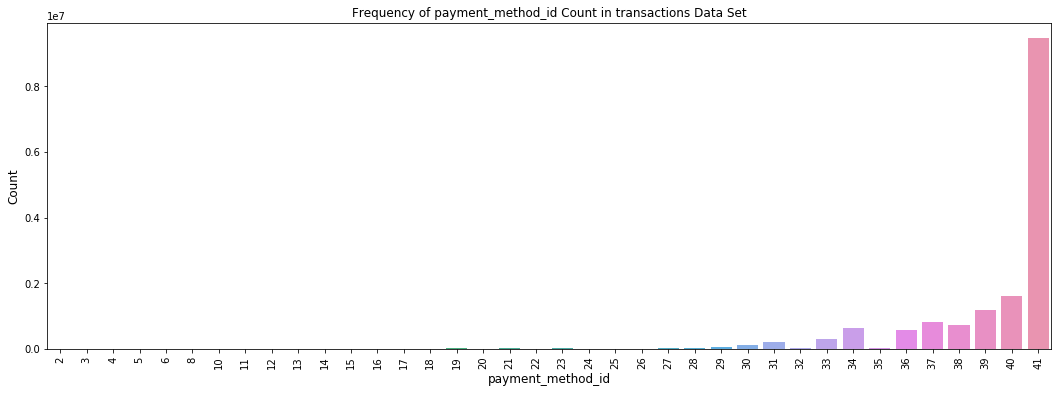

payment_method_id Count [(41, 9456686), (40, 1604601), (39, 1190457), (37, 814901), (38, 740378), (34, 653884), (36, 585510), (33, 318162), (31, 225553), (30, 110393), (29, 74427), (27, 46499), (35, 40700), (32, 37530), (23, 34387), (28, 30770), (19, 29581), (21, 18642), (18, 13361), (14, 12113), (24, 9248), (20, 7845), (16, 7788), (22, 4096), (25, 3662), (26, 2878), (17, 2106), (15, 2013), (11, 1860), (13, 1783), (12, 1088), (10, 1060), (8, 184), (6, 70), (5, 67), (3, 55), (2, 10), (4, 2)]


In [41]:
# payment_method_id count in transactions Data Set
fig = plt.figure(figsize=(18,6))
#plt.subplot(311)
sns.countplot(x="payment_method_id", data=TRANSACTION)
plt.ylabel('Count', fontsize=12)
plt.xlabel('payment_method_id', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of payment_method_id Count in transactions Data Set", fontsize=12)
plt.show()
fig.savefig("Frequency of payment_method_id Count in transactions Data Set.png", dpi=fig.dpi)
payment_method_id_count = Counter(TRANSACTION['payment_method_id']).most_common()
print("payment_method_id Count " +str(payment_method_id_count))

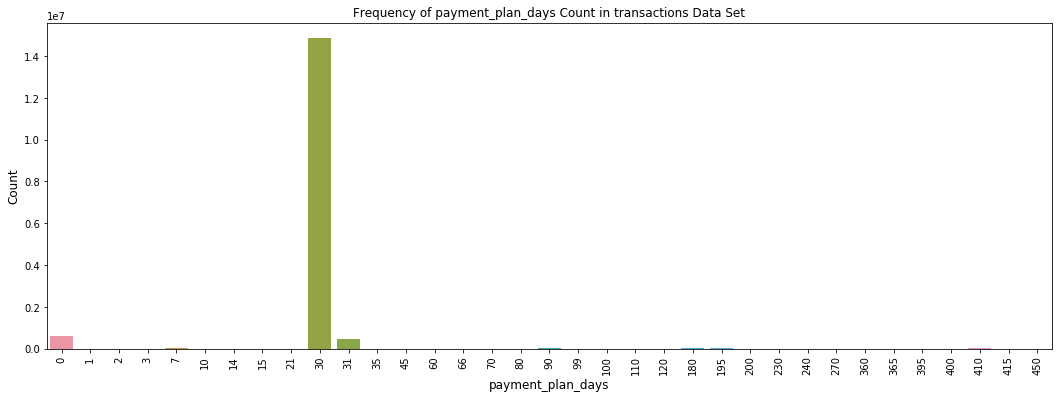

payment_plan_days Count [(30, 14863236), (0, 599586), (31, 470296), (7, 49294), (195, 27685), (410, 18347), (180, 11651), (90, 10346), (100, 6863), (120, 6637), (10, 5125), (60, 3230), (1, 2844), (395, 1959), (360, 1880), (200, 1448), (240, 1073), (400, 745), (14, 598), (365, 326), (35, 274), (450, 217), (70, 189), (80, 102), (21, 97), (270, 89), (99, 67), (66, 56), (230, 31), (415, 22), (110, 19), (3, 8), (15, 4), (45, 3), (2, 3)]


In [42]:
# payment_plan_days count in transactions Data Set
fig = plt.figure(figsize=(18,6))
sns.countplot(x="payment_plan_days", data=TRANSACTION)
plt.ylabel('Count', fontsize=12)
plt.xlabel('payment_plan_days', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of payment_plan_days Count in transactions Data Set", fontsize=12)
plt.show()
fig.savefig("Frequency of payment_plan_days Count in transactions Data Set.png", dpi=fig.dpi)
payment_plan_days_count = Counter(TRANSACTION['payment_plan_days']).most_common()
print("payment_plan_days Count " +str(payment_plan_days_count))

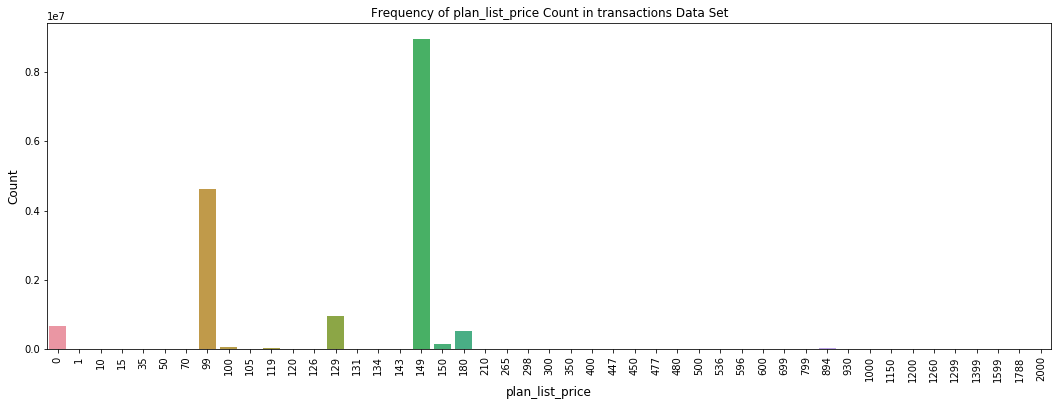

plan_list_price Count [(149, 8953761), (99, 4631261), (129, 967358), (0, 657985), (180, 524676), (150, 162534), (100, 63571), (894, 27806), (119, 24919), (1788, 18429), (477, 9756), (536, 8824), (480, 6537), (298, 4045), (300, 3199), (1599, 2596), (134, 2534), (1200, 2447), (120, 2336), (35, 1894), (447, 1539), (799, 1417), (930, 1265), (600, 678), (699, 543), (450, 470), (500, 331), (131, 311), (1299, 232), (50, 219), (350, 189), (1000, 180), (400, 102), (210, 80), (126, 63), (105, 52), (70, 51), (596, 37), (1150, 31), (2000, 27), (1, 22), (143, 20), (1399, 12), (15, 6), (10, 3), (265, 1), (1260, 1)]


In [43]:
# plan_list_price count in transactions Data Set
fig = plt.figure(figsize=(18,6))
sns.countplot(x="plan_list_price", data=TRANSACTION)
plt.ylabel('Count', fontsize=12)
plt.xlabel('plan_list_price', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of plan_list_price Count in transactions Data Set", fontsize=12)
plt.show()
fig.savefig("Frequency of plan_list_price Count in transactions Data Set.png", dpi=fig.dpi)
plan_list_price_count = Counter(TRANSACTION['plan_list_price']).most_common()
print("plan_list_price Count " +str(plan_list_price_count))

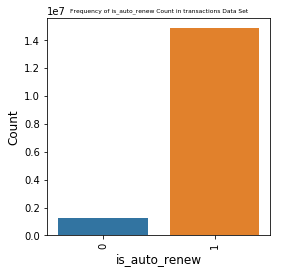

is_auto_renew Count [('1', 14864955), ('0', 1219395)]


In [44]:
# is_auto_renew count in transactions Data Set
fig = plt.figure(figsize=(4,4))
sns.countplot(x="is_auto_renew", data=TRANSACTION)
plt.ylabel('Count', fontsize=12)
plt.xlabel('is_auto_renew', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of is_auto_renew Count in transactions Data Set", fontsize=6)
plt.show()
fig.savefig("Frequency of is_auto_renew Count in transactions Data Set.png", dpi=fig.dpi)
is_auto_renew_count = Counter(TRANSACTION['is_auto_renew']).most_common()
print("is_auto_renew Count " +str(is_auto_renew_count))

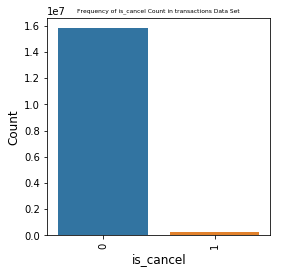

is_cancel Count [('0', 15805397), ('1', 278953)]


In [45]:
# is_cancel count in transactions Data Set
fig = plt.figure(figsize=(4,4))
sns.countplot(x="is_cancel", data=TRANSACTION)
plt.ylabel('Count', fontsize=12)
plt.xlabel('is_cancel', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of is_cancel Count in transactions Data Set", fontsize=6)
plt.show()
fig.savefig("Frequency of is_cancel Count in transactions Data Set.png", dpi=fig.dpi)
is_cancel_count = Counter(TRANSACTION['is_cancel']).most_common()
print("is_cancel Count " +str(is_cancel_count))